Программа на сегодня:

1. Функции минимума, максимума, скользящее среднее
2. Гистограмма, квантиль
3. Корреляция параметров
4. Автокорреляция, сезонность
5. Тренд

ДЗ 2: рассмотреть данные по следующей ссылке изученными методами. Написать отчет, в котором должны содержаться следующие пункты:

1) какие выводы можно сделать по данным,

2) какие методы из изученных применимы, какие не применимы для данного датасета и почему.

**Это ДЗ конкурсное, будет выбрано 3 победителя**.

Критерий оценки: детальность отчета.

* ссылка на данные для ДЗ (источник: [Industrial Production: Electric and gas utilities](https://fred.stlouisfed.org/series/IPG2211A2N)):

https://github.com/anastasiarazb/skillbox-data-analyst-intensive/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%94%D0%B5%D0%BD%D1%8C%202/IPG2211A2N.xls?raw=true


* ссылка на данные о погоде в Москве за 5 лет (источник: [rp5.ru](https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B5_(%D0%92%D0%94%D0%9D%D0%A5))):

https://github.com/anastasiarazb/skillbox_nlp_demo/blob/master/%D0%9C%D1%81%D0%BA_5%D0%BB%D0%B5%D1%82.xls?raw=true


ДЗ сдается в виде ссылки на файл, аналогичный этому, через Google Форму в Telegram чате.

**Дедлайн:** 17:00 по МСК


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = 'https://github.com/anastasiarazb/skillbox-data-analyst-intensive/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%94%D0%B5%D0%BD%D1%8C%202/IPG2211A2N.xls?raw=true'
data = pd.read_excel(path, skiprows=10)
data

,observation_date,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133
...,...,...
967,2019-08-01,111.2697
968,2019-09-01,102.0033
969,2019-10-01,93.9993
970,2019-11-01,99.8843


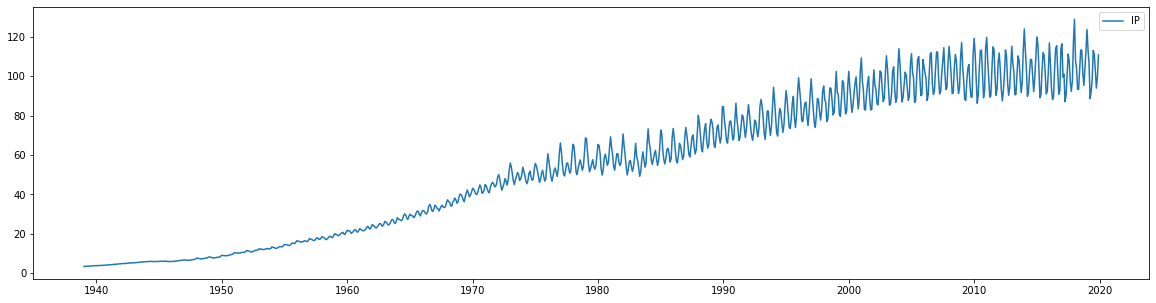

In [ ]:
x = data['observation_date']
y = data['IPG2211A2N']

plt.figure(figsize=(20, 5))
plt.plot(x, y, label='IP')
plt.legend()

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = pd.DataFrame(data.index)
Y = data['IPG2211A2N']

model.fit(X, Y)
trend = model.predict(X)

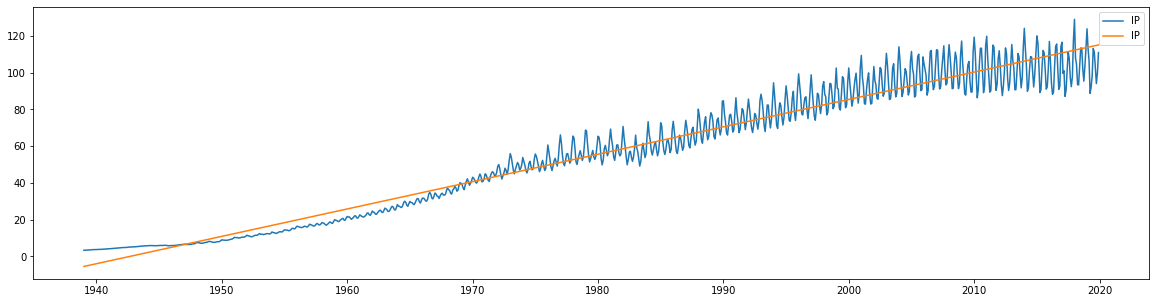

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(x, y, label='IP')
plt.plot(x, trend, label='IP')
plt.legend()

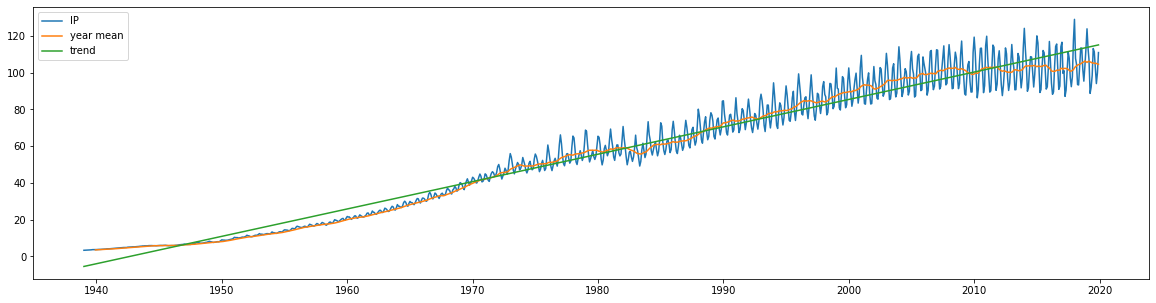

In [ ]:
x = data['observation_date']
plt.figure(figsize=(20, 5))
plt.plot(x, data['IPG2211A2N'], label='IP')
plt.plot(x, data['IPG2211A2N'].rolling(12).mean(), label='year mean')
plt.plot(x, trend, label='trend')
plt.legend()

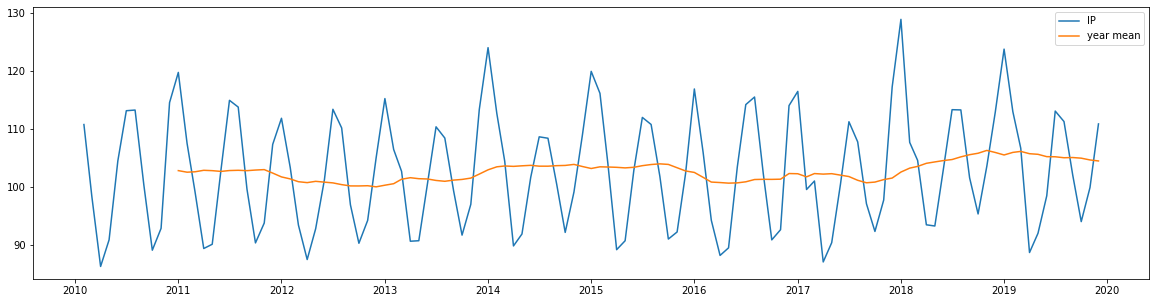

In [ ]:
start_date = pd.Timestamp(day=1, month=1, year=2010)

data_short = data[data['observation_date'] > start_date]

x = data_short['observation_date']
plt.figure(figsize=(20, 5))
plt.plot(x, data_short['IPG2211A2N'], label='IP')
plt.plot(x, data_short['IPG2211A2N'].rolling(12).mean(), label='year mean')
plt.legend()

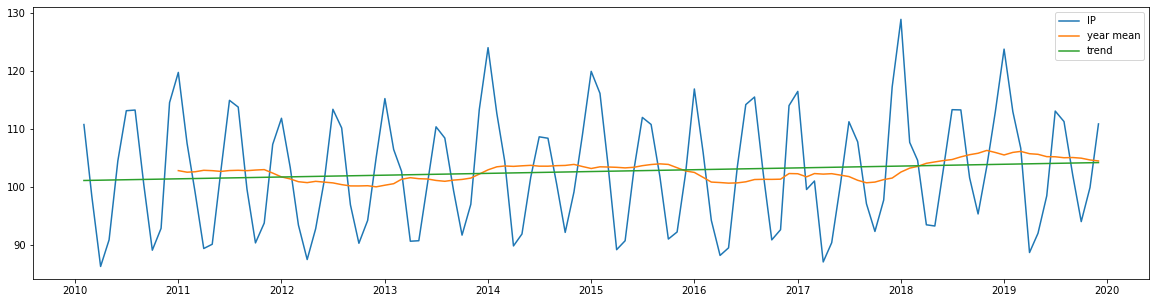

In [ ]:
model = LinearRegression()
X = pd.DataFrame(data_short.index)
Y = data_short['IPG2211A2N']

model.fit(X, Y)
trend = model.predict(X)

x = data_short['observation_date']
plt.figure(figsize=(20, 5))
plt.plot(x, data_short['IPG2211A2N'], label='IP')
plt.plot(x, data_short['IPG2211A2N'].rolling(12).mean(), label='year mean')
plt.plot(x, trend, label='trend')
plt.legend()

In [ ]:
trend

array([101.09621403, 101.12239893, 101.14858382, 101.17476871,
       101.2009536 , 101.2271385 , 101.25332339, 101.27950828,
       101.30569317, 101.33187807, 101.35806296, 101.38424785,
       101.41043274, 101.43661764, 101.46280253, 101.48898742,
       101.51517231, 101.54135721, 101.5675421 , 101.59372699,
       101.61991188, 101.64609678, 101.67228167, 101.69846656,
       101.72465145, 101.75083635, 101.77702124, 101.80320613,
       101.82939102, 101.85557592, 101.88176081, 101.9079457 ,
       101.93413059, 101.96031548, 101.98650038, 102.01268527,
       102.03887016, 102.06505505, 102.09123995, 102.11742484,
       102.14360973, 102.16979462, 102.19597952, 102.22216441,
       102.2483493 , 102.27453419, 102.30071909, 102.32690398,
       102.35308887, 102.37927376, 102.40545866, 102.43164355,
       102.45782844, 102.48401333, 102.51019823, 102.53638312,
       102.56256801, 102.5887529 , 102.6149378 , 102.64112269,
       102.66730758, 102.69349247, 102.71967737, 102.74

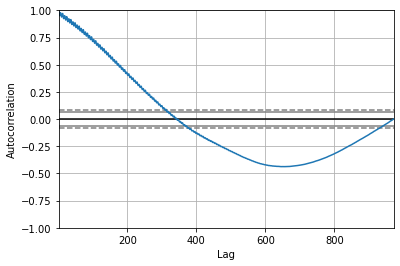

In [ ]:
pd.plotting.autocorrelation_plot(data['IPG2211A2N'])

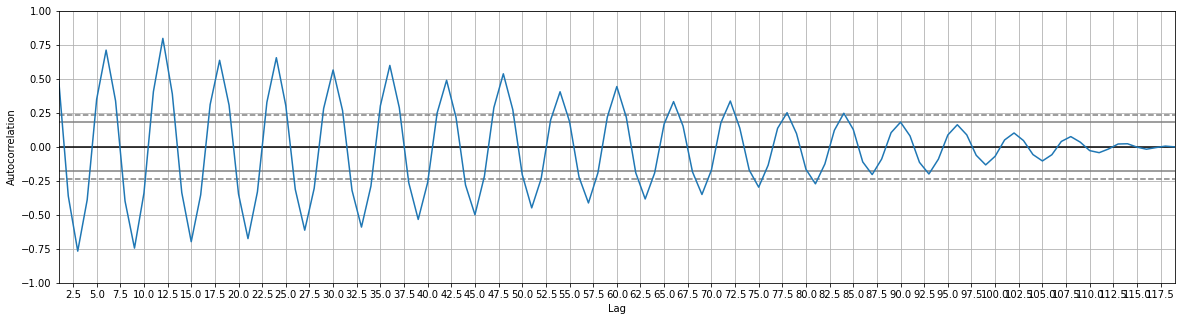

In [ ]:
plt.figure(figsize=(20, 5))
pd.plotting.autocorrelation_plot(data_short['IPG2211A2N'])
plt.locator_params(axis='x', nbins=50)